In [1]:
'''
Jan 14, 2017
CPM
NBA_shot_logs

Add player position information.

https://www.kaggle.com/dansbecker/nba-shot-logs
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('shot_logs_pos.csv')

In [3]:
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,player_pos,player_pos_ID,CD_pos,CD_pos_ID,Unnamed: 25
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,01:09,10.8,2,...,1.3,1,2,brian roberts,203148,PG,1.0,SG,2.0,0.0
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,00:14,3.4,0,...,6.1,0,0,brian roberts,203148,PG,1.0,SF,3.0,0.0
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,00:00,NaN,3,...,0.9,0,0,brian roberts,203148,PG,1.0,SF,3.0,0.0
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,3.4,0,0,brian roberts,203148,PG,1.0,NaN,NaN,NaN
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,1.1,0,0,brian roberts,203148,PG,1.0,PF,4.0,0.0


In [4]:
df.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id', 'player_pos', 'player_pos_ID', 'CD_pos',
       'CD_pos_ID', 'Unnamed: 25'],
      dtype='object')

In [6]:
df1 = df[['GAME_ID','MATCHUP','FGM','PTS_TYPE','CLOSE_DEF_DIST','player_name','player_pos', 'player_pos_ID','CLOSEST_DEFENDER' ,'CD_pos',
       'CD_pos_ID']]

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id,player_pos_ID,CD_pos_ID,Unnamed: 25
GAME_ID,,,,,,,,,,,,,,,,
21400001,204,1269,391,2105.2,282,403.7,1631.5,348,30827387,614.9,65,137,31216590,476.0,417.0,0.0
21400002,3,862,332,1531.2,370,450.1,1986.0,318,12875901,582.3,68,155,9573945,267.0,276.0,0.0
21400003,-342,666,271,1376.0,273,378.8,1610.1,264,16301264,441.8,48,110,12944596,330.0,250.0,0.0
21400004,82,1155,432,1780.7,322,410.6,2360.8,357,30017033,698.5,69,151,26903720,447.0,339.0,0.0
21400005,516,611,274,1277.0,195,261.4,1484.7,252,20833420,415.6,45,99,18979793,238.0,173.0,0.0
21400006,64,935,376,1969.4,358,410.0,1944.0,346,23449024,591.8,80,174,22137231,422.0,412.0,0.0
21400007,204,898,358,1603.8,229,367.2,2052.8,335,11029631,648.0,67,148,15128678,381.0,409.0,0.0
21400008,7,867,355,1841.0,230,324.7,2040.3,339,25379610,698.3,71,163,25370444,445.0,431.0,0.0
21400009,88,882,350,1771.2,217,325.4,1714.0,299,20897059,546.8,72,153,19290556,411.0,322.0,0.0


In [80]:
df1.dropna(inplace=True)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
df1.reset_index(drop=True,inplace=True)

In [82]:
df1.head()

,GAME_ID,MATCHUP,FGM,PTS_TYPE,CLOSE_DEF_DIST,player_name,player_pos,player_pos_ID,CLOSEST_DEFENDER,CD_pos,CD_pos_ID
0,21400899,"MAR 04, 2015 - CHA @ BKN",1,2,1.3,brian roberts,PG,1.0,"Anderson, Alan",SG,2.0
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,3,6.1,brian roberts,PG,1.0,"Bogdanovic, Bojan",SF,3.0
2,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,0.9,brian roberts,PG,1.0,"Bogdanovic, Bojan",SF,3.0
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,1.1,brian roberts,PG,1.0,"Young, Thaddeus",PF,4.0
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,2.6,brian roberts,PG,1.0,"Williams, Deron",PG,1.0


In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92351 entries, 0 to 92350
Data columns (total 11 columns):
GAME_ID             92351 non-null int64
MATCHUP             92351 non-null object
FGM                 92351 non-null int64
PTS_TYPE            92351 non-null int64
CLOSE_DEF_DIST      92351 non-null float64
player_name         92351 non-null object
player_pos          92351 non-null object
player_pos_ID       92351 non-null float64
CLOSEST_DEFENDER    92351 non-null object
CD_pos              92351 non-null object
CD_pos_ID           92351 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


In [95]:
df1[df1['CLOSE_DEF_DIST']<20]

,GAME_ID,MATCHUP,FGM,PTS_TYPE,CLOSE_DEF_DIST,player_name,player_pos,player_pos_ID,CLOSEST_DEFENDER,CD_pos,CD_pos_ID
0,21400899,"MAR 04, 2015 - CHA @ BKN",1,2,1.3,brian roberts,PG,1.0,"Anderson, Alan",SG,2.0
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,3,6.1,brian roberts,PG,1.0,"Bogdanovic, Bojan",SF,3.0
2,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,0.9,brian roberts,PG,1.0,"Bogdanovic, Bojan",SF,3.0
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,1.1,brian roberts,PG,1.0,"Young, Thaddeus",PF,4.0
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,2.6,brian roberts,PG,1.0,"Williams, Deron",PG,1.0
5,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,6.1,brian roberts,PG,1.0,"Jack, Jarrett",PG,1.0
6,21400899,"MAR 04, 2015 - CHA @ BKN",1,2,2.1,brian roberts,PG,1.0,"Plumlee, Mason",C,5.0
7,21400890,"MAR 03, 2015 - CHA vs. LAL",0,3,19.8,brian roberts,PG,1.0,"Ellington, Wayne",SG,2.0
8,21400890,"MAR 03, 2015 - CHA vs. LAL",0,3,4.7,brian roberts,PG,1.0,"Lin, Jeremy",PG,1.0
9,21400890,"MAR 03, 2015 - CHA vs. LAL",1,2,1.8,brian roberts,PG,1.0,"Lin, Jeremy",PG,1.0


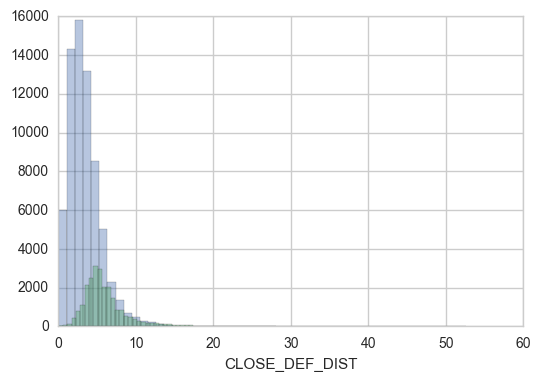

In [101]:
sns.set_style('whitegrid')
sns.distplot(df1[df1['PTS_TYPE']==2]['CLOSE_DEF_DIST'],kde=False,bins=50)
sns.distplot(df1[df1['PTS_TYPE']==3]['CLOSE_DEF_DIST'],kde=False,bins=50)

In [102]:
df_PG = df1[df1['player_pos']=='PG']

In [103]:
def miss_match(num):
    if num>=5:
        return 1
    else:
        return 0
    
df_PG['miss match'] = df_PG['CD_pos_ID'].apply(miss_match)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [104]:
df_PG.head()

,GAME_ID,MATCHUP,FGM,PTS_TYPE,CLOSE_DEF_DIST,player_name,player_pos,player_pos_ID,CLOSEST_DEFENDER,CD_pos,CD_pos_ID,miss match
0,21400899,"MAR 04, 2015 - CHA @ BKN",1,2,1.3,brian roberts,PG,1.0,"Anderson, Alan",SG,2.0,0
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,3,6.1,brian roberts,PG,1.0,"Bogdanovic, Bojan",SF,3.0,0
2,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,0.9,brian roberts,PG,1.0,"Bogdanovic, Bojan",SF,3.0,0
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,1.1,brian roberts,PG,1.0,"Young, Thaddeus",PF,4.0,0
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,2.6,brian roberts,PG,1.0,"Williams, Deron",PG,1.0,0


In [106]:
df_PG.groupby('miss match').describe()

CD_pos_ID  CLOSE_DEF_DIST           FGM       GAME_ID  \
miss match                                                                   
0          count  18870.000000    18870.000000  18870.000000  1.887000e+04   
           mean       2.013725        4.184298      0.422311  2.140045e+07   
           std        1.195622        2.629593      0.493941  2.505301e+02   
           min        1.000000        0.000000      0.000000  2.140000e+07   
           25%        1.000000        2.500000      0.000000  2.140024e+07   
           50%        1.000000        3.800000      0.000000  2.140044e+07   
           75%        3.000000        5.200000      1.000000  2.140064e+07   
           max        4.000000       48.900000      1.000000  2.140091e+07   
1          count   2907.000000     2907.000000   2907.000000  2.907000e+03   
           mean       5.000000        3.804094      0.456140  2.140045e+07   
           std        0.000000        2.680595      0.498158  2.533246e+02   
           min        5.000000        0.000000      0.000000  2.140000e+07   
           25%        5.000000        2.000000      0.000000  2.140023e+07   
           50%        5.000000        3.300000      0.000000  2.140044e+07   
           75%        5.000000        5.000000      1.000000  2.140066e+07   
           max        5.000000       23.000000      1.000000  2.140091e+07   

                      PTS_TYPE  player_pos_ID  
miss match                                     
0          count  18870.000000        18870.0  
           mean       2.344091            1.0  
           std        0.475084            0.0  
           min        2.000000            1.0  
           25%        2.000000            1.0  
           50%        2.000000            1.0  
           75%        3.000000            1.0  
           max        3.000000            1.0  
1          count   2907.000000         2907.0  
           mean       2.129687            1.0  
           std        0.336017            0.0  
           min        2.000000            1.0  
           25%        2.000000            1.0  
           50%        2.000000            1.0  
           75%        2.000000            1.0  
           max        3.000000            1.0

In [109]:
df_PG.pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])

player_pos_ID             1.0
miss match PTS_TYPE          
0          2         3.452339
           3         5.579563
1          2         3.265375
           3         7.419363

In [111]:
df_PG.pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'],aggfunc='count')

player_pos_ID          1.0
miss match PTS_TYPE       
0          2         12377
           3          6493
1          2          2530
           3           377

In [14]:
df_C = df1[df1['player_pos']=='C']

In [15]:
def miss_match(num):
    if num<=2:
        return 1
    else:
        return 0
    
df_C['miss match'] = df_C['CD_pos_ID'].apply(miss_match)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
df_C.head()

,GAME_ID,MATCHUP,FGM,PTS_TYPE,player_name,player_pos,player_pos_ID,CLOSEST_DEFENDER,CD_pos,CD_pos_ID,miss match
271,21400899,"MAR 04, 2015 - CHA @ BKN",1,2,bismack biyombo,C,5.0,"Young, Thaddeus",PF,4.0,0
272,21400890,"MAR 03, 2015 - CHA vs. LAL",0,2,bismack biyombo,C,5.0,"Lin, Jeremy",PG,1.0,1
273,21400652,"JAN 24, 2015 - CHA vs. NYK",0,2,bismack biyombo,C,5.0,"Smith, Jason",C,5.0,0
274,21400643,"JAN 23, 2015 - CHA @ CLE",0,2,bismack biyombo,C,5.0,"Love, Kevin",PF,4.0,0
275,21400643,"JAN 23, 2015 - CHA @ CLE",1,2,bismack biyombo,C,5.0,"Mozgov, Timofey",C,5.0,0


In [17]:
df_C.groupby('miss match').describe()

CD_pos_ID           FGM       GAME_ID      PTS_TYPE  \
miss match                                                                 
0          count  13150.000000  13150.000000  1.315000e+04  13150.000000   
           mean       4.455817      0.496502  2.140046e+07      2.021445   
           std        0.667911      0.500007  2.564234e+02      0.144867   
           min        3.000000      0.000000  2.140000e+07      2.000000   
           25%        4.000000      0.000000  2.140023e+07      2.000000   
           50%        5.000000      0.000000  2.140047e+07      2.000000   
           75%        5.000000      1.000000  2.140067e+07      2.000000   
           max        5.000000      1.000000  2.140091e+07      3.000000   
1          count   2129.000000   2129.000000  2.129000e+03   2129.000000   
           mean       1.497417      0.581963  2.140046e+07      2.035228   
           std        0.500111      0.493352  2.553025e+02      0.184398   
           min        1.000000      0.000000  2.140000e+07      2.000000   
           25%        1.000000      0.000000  2.140023e+07      2.000000   
           50%        1.000000      1.000000  2.140046e+07      2.000000   
           75%        2.000000      1.000000  2.140067e+07      2.000000   
           max        2.000000      1.000000  2.140091e+07      3.000000   

                  player_pos_ID  
miss match                       
0          count        13150.0  
           mean             5.0  
           std              0.0  
           min              5.0  
           25%              5.0  
           50%              5.0  
           75%              5.0  
           max              5.0  
1          count         2129.0  
           mean             5.0  
           std              0.0  
           min              5.0  
           25%              5.0  
           50%              5.0  
           75%              5.0  
           max              5.0

In [18]:
df_SG = df1[df1['player_pos']=='SG']

In [19]:
def miss_match(num):
    if num>=5:
        return 1
    else:
        return 0
    
df_SG['miss match'] = df_SG['CD_pos_ID'].apply(miss_match)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
df_SG.head()

,GAME_ID,MATCHUP,FGM,PTS_TYPE,player_name,player_pos,player_pos_ID,CLOSEST_DEFENDER,CD_pos,CD_pos_ID,miss match
1260,21400902,"MAR 04, 2015 - MIN vs. DEN",1,3,gary neal,SG,2.0,"Lawson, Ty",PG,1.0,0
1261,21400888,"MAR 02, 2015 - MIN vs. LAC",0,2,gary neal,SG,2.0,"Hawes, Spencer",PF,4.0,0
1262,21400888,"MAR 02, 2015 - MIN vs. LAC",1,2,gary neal,SG,2.0,"Hawes, Spencer",PF,4.0,0
1263,21400888,"MAR 02, 2015 - MIN vs. LAC",1,2,gary neal,SG,2.0,"Jordan, DeAndre",C,5.0,1
1264,21400873,"FEB 28, 2015 - MIN vs. MEM",1,3,gary neal,SG,2.0,"Koufos, Kosta",C,5.0,1


In [21]:
df_SG.groupby('miss match').describe()

CD_pos_ID           FGM       GAME_ID      PTS_TYPE  \
miss match                                                                 
0          count  15805.000000  15805.000000  1.580500e+04  15805.000000   
           mean       2.458399      0.425941  2.140044e+07      2.403417   
           std        1.041043      0.494501  2.519973e+02      0.490598   
           min        1.000000      0.000000  2.140000e+07      2.000000   
           25%        2.000000      0.000000  2.140023e+07      2.000000   
           50%        2.000000      0.000000  2.140043e+07      2.000000   
           75%        3.000000      1.000000  2.140065e+07      3.000000   
           max        4.000000      1.000000  2.140091e+07      3.000000   
1          count   2151.000000   2151.000000  2.151000e+03   2151.000000   
           mean       5.000000      0.452348  2.140045e+07      2.180381   
           std        0.000000      0.497840  2.515047e+02      0.384594   
           min        5.000000      0.000000  2.140000e+07      2.000000   
           25%        5.000000      0.000000  2.140024e+07      2.000000   
           50%        5.000000      0.000000  2.140046e+07      2.000000   
           75%        5.000000      1.000000  2.140066e+07      2.000000   
           max        5.000000      1.000000  2.140091e+07      3.000000   

                  player_pos_ID  
miss match                       
0          count        15805.0  
           mean             2.0  
           std              0.0  
           min              2.0  
           25%              2.0  
           50%              2.0  
           75%              2.0  
           max              2.0  
1          count         2151.0  
           mean             2.0  
           std              0.0  
           min              2.0  
           25%              2.0  
           50%              2.0  
           75%              2.0  
           max              2.0

In [22]:
df_PF = df1[df1['player_pos']=='PF']

In [23]:
def miss_match(num):
    if num<=2:
        return 1
    else:
        return 0
    
df_PF['miss match'] = df_PF['CD_pos_ID'].apply(miss_match)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
df_PF.head()

,GAME_ID,MATCHUP,FGM,PTS_TYPE,player_name,player_pos,player_pos_ID,CLOSEST_DEFENDER,CD_pos,CD_pos_ID,miss match
3166,21400899,"MAR 04, 2015 - CHA @ BKN",1,3,marvin williams,PF,4.0,"Johnson, Joe",SG,2.0,1
3167,21400899,"MAR 04, 2015 - CHA @ BKN",1,3,marvin williams,PF,4.0,"Johnson, Joe",SG,2.0,1
3168,21400899,"MAR 04, 2015 - CHA @ BKN",1,2,marvin williams,PF,4.0,"Lopez, Brook",C,5.0,0
3169,21400899,"MAR 04, 2015 - CHA @ BKN",1,3,marvin williams,PF,4.0,"Young, Thaddeus",PF,4.0,0
3170,21400899,"MAR 04, 2015 - CHA @ BKN",0,3,marvin williams,PF,4.0,"Williams, Deron",PG,1.0,1


In [25]:
df_PF.groupby('miss match').describe()

CD_pos_ID           FGM       GAME_ID      PTS_TYPE  \
miss match                                                                 
0          count  17396.000000  17396.000000  1.739600e+04  17396.000000   
           mean       4.212233      0.463612  2.140045e+07      2.176765   
           std        0.654805      0.498689  2.539887e+02      0.381480   
           min        3.000000      0.000000  2.140000e+07      2.000000   
           25%        4.000000      0.000000  2.140024e+07      2.000000   
           50%        4.000000      0.000000  2.140045e+07      2.000000   
           75%        5.000000      1.000000  2.140067e+07      2.000000   
           max        5.000000      1.000000  2.140091e+07      3.000000   
1          count   3227.000000   3227.000000  3.227000e+03   3227.000000   
           mean       1.522467      0.520297  2.140045e+07      2.218779   
           std        0.499572      0.499665  2.578034e+02      0.413482   
           min        1.000000      0.000000  2.140000e+07      2.000000   
           25%        1.000000      0.000000  2.140023e+07      2.000000   
           50%        2.000000      1.000000  2.140045e+07      2.000000   
           75%        2.000000      1.000000  2.140067e+07      2.000000   
           max        2.000000      1.000000  2.140091e+07      3.000000   

                  player_pos_ID  
miss match                       
0          count        17396.0  
           mean             4.0  
           std              0.0  
           min              4.0  
           25%              4.0  
           50%              4.0  
           75%              4.0  
           max              4.0  
1          count         3227.0  
           mean             4.0  
           std              0.0  
           min              4.0  
           25%              4.0  
           50%              4.0  
           75%              4.0  
           max              4.0

In [26]:
df1['CD_pos_ID'].unique()

array([ 2.,  3.,  4.,  1.,  5.])

In [27]:
df1['player_pos_ID'].unique()

array([ 1.,  5.,  2.,  3.,  4.])

In [75]:
df_PF.pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])

player_pos_ID             4.0
miss match PTS_TYPE          
0          2         0.490189
           3         0.339837
1          2         0.568822
           3         0.347025

In [76]:
df_PF.pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'],aggfunc='count')

player_pos_ID          4.0
miss match PTS_TYPE       
0          2         14321
           3          3075
1          2          2521
           3           706

In [77]:
df_PG.pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])

player_pos_ID             1.0
miss match PTS_TYPE          
0          2         0.467722
           3         0.335746
1          2         0.470356
           3         0.360743

In [78]:
df_PG.pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'],aggfunc='count')

player_pos_ID          1.0
miss match PTS_TYPE       
0          2         12377
           3          6493
1          2          2530
           3           377

In [30]:
df_SG.pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])

player_pos_ID             2.0
miss match PTS_TYPE          
0          2         0.468130
           3         0.363551
1          2         0.469087
           3         0.376289

In [31]:
df_C.pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])

player_pos_ID             5.0
miss match PTS_TYPE          
0          2         0.500544
           3         0.312057
1          2         0.590555
           3         0.346667

In [32]:
# defend

In [33]:
df1.head()

,GAME_ID,MATCHUP,FGM,PTS_TYPE,player_name,player_pos,player_pos_ID,CLOSEST_DEFENDER,CD_pos,CD_pos_ID
0,21400899,"MAR 04, 2015 - CHA @ BKN",1,2,brian roberts,PG,1.0,"Anderson, Alan",SG,2.0
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,3,brian roberts,PG,1.0,"Bogdanovic, Bojan",SF,3.0
2,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,brian roberts,PG,1.0,"Bogdanovic, Bojan",SF,3.0
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,brian roberts,PG,1.0,"Young, Thaddeus",PF,4.0
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,2,brian roberts,PG,1.0,"Williams, Deron",PG,1.0


In [67]:
df_dSG = df1[df1['CD_pos']=='SG']

In [68]:
def miss_match(num):
    if num>=4:
        return 1
    else:
        return 0
    
df_dSG['miss match'] = df_dSG['player_pos_ID'].apply(miss_match)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
df_dSG.head()

,GAME_ID,MATCHUP,FGM,PTS_TYPE,player_name,player_pos,player_pos_ID,CLOSEST_DEFENDER,CD_pos,CD_pos_ID,miss match
0,21400899,"MAR 04, 2015 - CHA @ BKN",1,2,brian roberts,PG,1.0,"Anderson, Alan",SG,2.0,0
7,21400890,"MAR 03, 2015 - CHA vs. LAL",0,3,brian roberts,PG,1.0,"Ellington, Wayne",SG,2.0,0
15,21400845,"FEB 25, 2015 - CHA @ CHI",1,2,brian roberts,PG,1.0,"Hinrich, Kirk",SG,2.0,0
17,21400845,"FEB 25, 2015 - CHA @ CHI",0,3,brian roberts,PG,1.0,"Hinrich, Kirk",SG,2.0,0
19,21400845,"FEB 25, 2015 - CHA @ CHI",0,3,brian roberts,PG,1.0,"Butler, Jimmy",SG,2.0,0


In [70]:
df_dSG.pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['CD_pos_ID'])

CD_pos_ID                 2.0
miss match PTS_TYPE          
0          2         0.470125
           3         0.351814
1          2         0.564974
           3         0.348089

In [71]:
df_dSG.pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['CD_pos_ID'],aggfunc='count')

CD_pos_ID             2.0
miss match PTS_TYPE      
0          2         6862
           3         4852
1          2         2501
           3          497

In [72]:
df_dSG.groupby('miss match').describe()

CD_pos_ID           FGM       GAME_ID      PTS_TYPE  \
miss match                                                              
0          count    11714.0  11714.000000  1.171400e+04  11714.000000   
           mean         2.0      0.421120  2.140045e+07      2.414205   
           std          0.0      0.493760  2.534721e+02      0.492605   
           min          2.0      0.000000  2.140000e+07      2.000000   
           25%          2.0      0.000000  2.140024e+07      2.000000   
           50%          2.0      0.000000  2.140043e+07      2.000000   
           75%          2.0      1.000000  2.140066e+07      3.000000   
           max          2.0      1.000000  2.140091e+07      3.000000   
1          count     2998.0   2998.000000  2.998000e+03   2998.000000   
           mean         2.0      0.529019  2.140046e+07      2.165777   
           std          0.0      0.499240  2.615182e+02      0.371943   
           min          2.0      0.000000  2.140000e+07      2.000000   
           25%          2.0      0.000000  2.140022e+07      2.000000   
           50%          2.0      1.000000  2.140047e+07      2.000000   
           75%          2.0      1.000000  2.140069e+07      2.000000   
           max          2.0      1.000000  2.140091e+07      3.000000   

                  player_pos_ID  
miss match                       
0          count   11714.000000  
           mean        2.020318  
           std         0.750831  
           min         1.000000  
           25%         1.000000  
           50%         2.000000  
           75%         3.000000  
           max         3.000000  
1          count    2998.000000  
           mean        4.353235  
           std         0.478055  
           min         4.000000  
           25%         4.000000  
           50%         4.000000  
           75%         5.000000  
           max         5.000000